## Final Project Submission

Please fill out:
* Student name: SHITOTE CLIFF
* Student pace: self paced / part time / full time : FULL TIME
* Scheduled project review date/time: 12-03-2023/ 12:00hrs
* Instructor name:William Okomba
* Blog post URL:https://github.com/CliffShitote/student-project.git


Project Objectives

    Understand data cleaning and different data issues.
    Define, identify and manage duplicates and unwanted observations.
    Quanitify and Handle Missing values.
    Ensure wanted observations are well structured.
    Define, identify and filter out outliers.
    Validate Data Accuracy.
    Demonstrate use of Lambda functions.

Data cleaning.
-Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

Types of data issues,
1. Duplicated data
2. Missing data
3. Ivalid/incorrect data
4. Conflicting data

Data anaysis

Loading python packages

In [168]:

# Your code here - remember to use markdown cells for comments as well!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline


In [169]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

Loading the data where we will use;
data
# loading the data
data = pd.read_csv("bom.movie_gross.csv", index_col=0)
# using the index_col=0 argument avoid having the index column as unnamed:0

Understanding the data

In [170]:
data = pd.read_csv("bom.movie_gross.csv.gz")
data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [171]:
data.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [172]:
data.tail(10)

,title,studio,domestic_gross,foreign_gross,year
3377,Let Yourself Go,Men.,12200.0,NaN,2018
3378,Hannah (2018),PDF,11700.0,NaN,2018
3379,Souvenir,Strand,11400.0,NaN,2018
3380,Furious (Legend of Kolovrat),CARUSEL,10000.0,NaN,2018
3381,Beauty and the Dogs,Osci.,8900.0,NaN,2018
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [173]:
def data_column(data):
    """Simple function that returns the columns in a DataFrame"""
    cols = list(data.columns)

    return cols


data_column(data)

['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

In [174]:
# shape of the data
def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns")

    return out

data_shape(data)

The DataFrame has:
	* 3387 rows
	* 5 columns


In [175]:
# info for the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [176]:
# description for statistics
data.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Now that we have the relevant data with us, we can now focus on the incomplete,irrelevant and incomplete entries as we continue with the data analysis

Data cleaning;
1. Removal of Duplicates
2. Unwanted Observations


In [177]:


# Duplicated entries
def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(data)



The Data has no duplicates


Findings

*There is no duplicates in the data entry above

In [178]:
# reconfirming for the duplicates 
def remove_duplicated_rows(data):
    """Simple Function to remove duplicated rows"""
    data.drop_duplicates(subset=None, keep="first", inplace=True)
    # confirm if the duplicated rows have been removed
    confirm = identify_duplicates(data)

    return confirm 


remove_duplicated_rows(data)

The Data has no duplicates


Data cleaning to eliminate NaN values

In [179]:
# check to see how many "NaN" values in bom.movie_gross.csv.gz
display(data.isna().sum())
# drop the Nan rows 
df_imdb_edit = data.dropna()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Missing Values;
1. Dropping values
2. Replacing value

In [180]:
# identify missing 
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(data)

The Data has missing values.


In [181]:
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(data)
missing_data

,Missing Values,Percentage(%)
foreign_gross,1350,0.398583
domestic_gross,28,0.008267
studio,5,0.001476


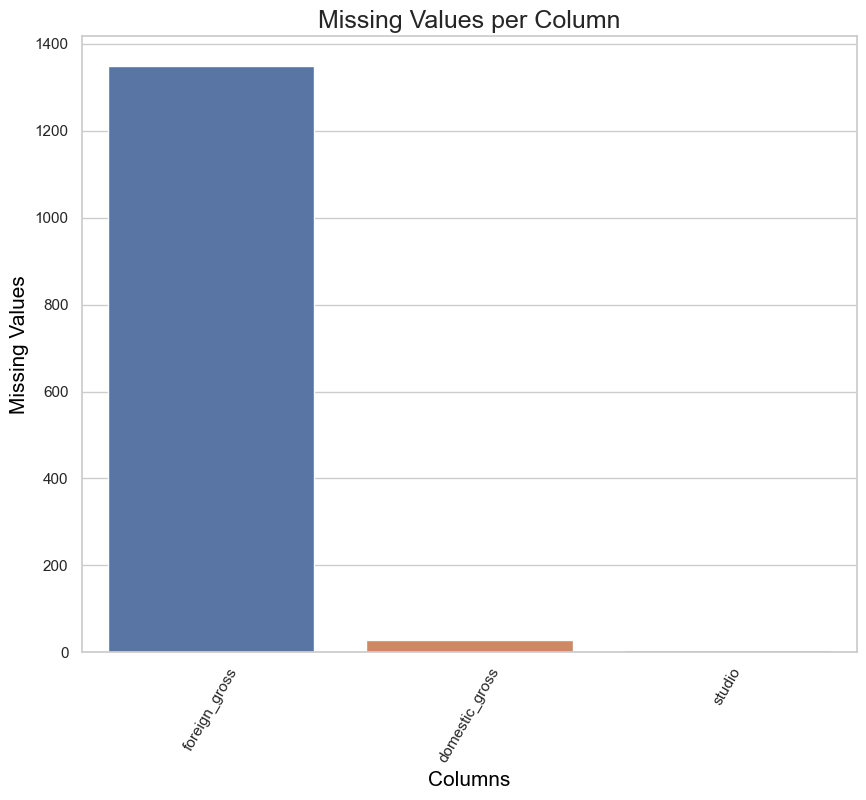

In [182]:
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (10, 8))

    # plot a bargraph
    sns.barplot(x = data.index , y = data["Missing Values"])
    # labeling the axes 
    plt.xlabel("Columns", fontdict={"color": "black", "size": 15})
    # rotating our xticks 
    plt.xticks(rotation = '60')
    # labeling the y axis 
    plt.ylabel("Missing Values", fontdict={"color": "black", "size": 15})
    # title 
    plt.title("Missing Values per Column", fontsize = 18)
    # display
    plt.show()

    # save the plot 
    fig.savefig("missing.png")


graph_missing(missing_data)

In [183]:


# drop missing values
def drop_missing_value(data, cols):
    """Simple function to drop columns"""
    data.drop(cols, axis = 1, inplace = True)
    
    # confirm columns have been dropped
    return data.columns


drop_missing_value(data, ["foreign_gross"])



Index(['title', 'studio', 'domestic_gross', 'year'], dtype='object')

In [184]:


def drop_row_missing(data, cols):
    """Simple function to drop row values with missing data in a specific column"""
    for col in cols:
        # drop along the row using axis = 0
        # specify the column using subset
        data.dropna(axis = 0, subset=col, inplace=True)
    
    # confirm the missing values dropped
    results = missing_values(data)

    return results

drop_row_missing(data, ["studio"])



,Missing Values,Percentage(%)
domestic_gross,26,0.007688


Fix Structural Issues

In [185]:


def remove_character(data, cols, characters):
    """simple function to remove characters"""
    # loop through the columns
    for col in cols:
        data[col] = data[col].str.strip(characters)

    return data.head()


remove_character(data,['studio'],'%')



,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


Data Types

In [186]:

# data types
data.dtypes


title              object
studio             object
domestic_gross    float64
year                int64
dtype: object

Outliers

In [187]:
def identify_extreme_revenue(data, columns):
    """Check if there are values greater than 100 and less than 0"""
    # empty list to store extreme points 
    extreme_revenue = []
    # loop through the columns
    for col in columns:
        # loop through column values
        for val in data[col]:
            # scores should be between 0 and 100 
            if (val > 100) or (val < 0):
                extreme_revenue.append(val)

    return extreme_revenue

revenue_columns = ['domestic_gross']
identify_extreme_revenue(data, revenue_columns)

[415000000.0,
 334200000.0,
 296000000.0,
 292600000.0,
 238700000.0,
 300500000.0,
 312400000.0,
 200800000.0,
 251500000.0,
 217600000.0,
 163200000.0,
 104400000.0,
 135500000.0,
 172100000.0,
 176600000.0,
 90800000.0,
 107000000.0,
 148400000.0,
 105300000.0,
 131800000.0,
 148400000.0,
 60100000.0,
 128000000.0,
 118300000.0,
 95300000.0,
 67600000.0,
 103100000.0,
 162000000.0,
 76400000.0,
 171200000.0,
 42800000.0,
 88800000.0,
 97000000.0,
 110500000.0,
 63200000.0,
 100500000.0,
 80600000.0,
 100200000.0,
 90400000.0,
 84800000.0,
 77200000.0,
 117200000.0,
 119200000.0,
 81600000.0,
 42400000.0,
 94800000.0,
 92200000.0,
 98700000.0,
 55700000.0,
 62000000.0,
 67099999.0,
 45700000.0,
 52500000.0,
 93600000.0,
 52000000.0,
 63100000.0,
 80000000.0,
 43600000.0,
 60000000.0,
 53400000.0,
 32700000.0,
 10100000.0,
 32400000.0,
 63000.0,
 47100000.0,
 48100000.0,
 35100000.0,
 29000000.0,
 61000000.0,
 39400000.0,
 63000000.0,
 73000000.0,
 33600000.0,
 25000000.0,
 19400000.0

<AxesSubplot:xlabel='domestic_gross'>

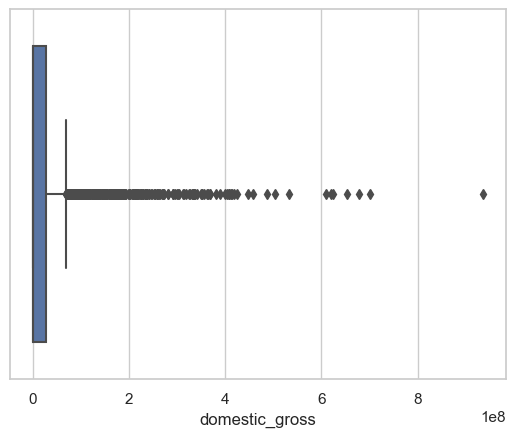

In [188]:

# we can also use a box plot to identify outliers

sns.boxplot(data=data, x="domestic_gross")

In [189]:


# using IQR
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


maths_outliers = IQR_outliers(data, "domestic_gross")
maths_outliers[0]



# using IQR
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


domestic_outliers = IQR_outliers(data, "domestic_gross")
domestic_outliers[0]



[415000000.0,
 334200000.0,
 296000000.0,
 292600000.0,
 238700000.0,
 300500000.0,
 312400000.0,
 200800000.0,
 251500000.0,
 217600000.0,
 163200000.0,
 104400000.0,
 135500000.0,
 172100000.0,
 176600000.0,
 90800000.0,
 107000000.0,
 148400000.0,
 105300000.0,
 131800000.0,
 148400000.0,
 128000000.0,
 118300000.0,
 95300000.0,
 103100000.0,
 162000000.0,
 76400000.0,
 171200000.0,
 88800000.0,
 97000000.0,
 110500000.0,
 100500000.0,
 80600000.0,
 100200000.0,
 90400000.0,
 84800000.0,
 77200000.0,
 117200000.0,
 119200000.0,
 81600000.0,
 94800000.0,
 92200000.0,
 98700000.0,
 93600000.0,
 80000000.0,
 73000000.0,
 381000000.0,
 352400000.0,
 241100000.0,
 281300000.0,
 209400000.0,
 165200000.0,
 209800000.0,
 254500000.0,
 142600000.0,
 191500000.0,
 149300000.0,
 186800000.0,
 143600000.0,
 176800000.0,
 181000000.0,
 77600000.0,
 176700000.0,
 146400000.0,
 133100000.0,
 85500000.0,
 169100000.0,
 127000000.0,
 123500000.0,
 102500000.0,
 98800000.0,
 83500000.0,
 116600000.0

<AxesSubplot:xlabel='year'>

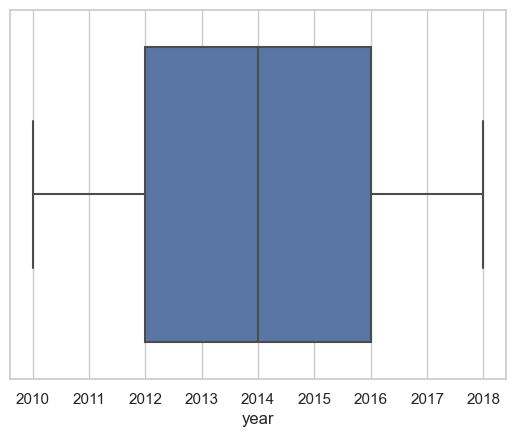

In [190]:

# check for outlier using boxplot
sns.boxplot(data=data, x="year")



In [191]:
# remove the outlier
def IQR_remove_outliers(data, column):
    """Simple function to remove the ouliers"""
    # get values from previous function 
    identify = IQR_outliers(data, column)
    Q1 = identify[1]
    Q3 = identify[2]
    IQR = identify[3]
    # remove the outliers
    df = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]

    return df

students_data = IQR_remove_outliers(data, "domestic_gross")

<AxesSubplot:xlabel='domestic_gross'>

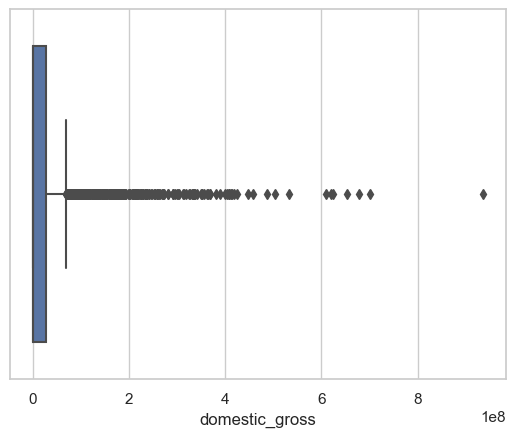

In [192]:
# confirm using a box plot

sns.boxplot(data=data, x="domestic_gross")

In [193]:
# what is happening
from matplotlib.cbook import boxplot_stats

stat = boxplot_stats(data["domestic_gross"])
stat

[{'mean': nan,
  'iqr': nan,
  'cilo': nan,
  'cihi': nan,
  'whishi': nan,
  'whislo': nan,
  'fliers': array([], dtype=float64),
  'q1': nan,
  'med': nan,
  'q3': nan}]

The value of the outlier is 415000000.0 which is above the maximum limit shown in the boxplot (whishi = nan). We do not have any outlier below minimum limit (whislo = nan).

In [194]:
# using IQR
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


year_outliers = IQR_outliers(data, "year")
year_outliers[0]

[]

<AxesSubplot:xlabel='year'>

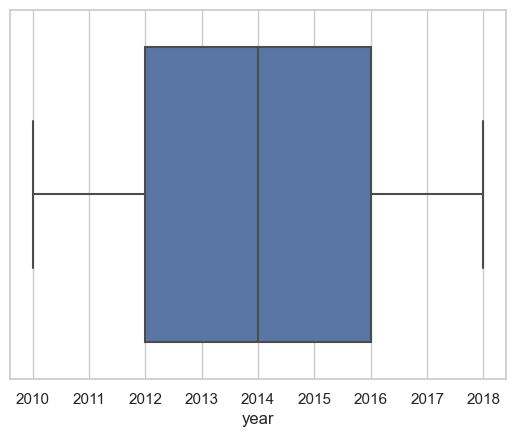

In [195]:
# check for outlier using boxplot
sns.boxplot(data=data, x="year")

In [196]:
# year outlier
year_outliers = IQR_outliers(data, "year")
year_outliers[0]

[]

Final Data

In [197]:
# reset the index
data.reset_index(drop=True, inplace=True)

In [198]:
# preview first 10 columns
data.head(10)

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,2010
6,Iron Man 2,Par.,312400000.0,2010
7,Tangled,BV,200800000.0,2010
8,Despicable Me,Uni.,251500000.0,2010
9,How to Train Your Dragon,P/DW,217600000.0,2010


In [199]:
# preview last 10 columns
data.tail(10)

,title,studio,domestic_gross,year
3372,Let Yourself Go,Men.,12200.0,2018
3373,Hannah (2018),PDF,11700.0,2018
3374,Souvenir,Strand,11400.0,2018
3375,Furious (Legend of Kolovrat),CARUSEL,10000.0,2018
3376,Beauty and the Dogs,Osci.,8900.0,2018
3377,The Quake,Magn.,6200.0,2018
3378,Edward II (2018 re-release),FM,4800.0,2018
3379,El Pacto,Sony,2500.0,2018
3380,The Swan,Synergetic,2400.0,2018
3381,An Actor Prepares,Grav.,1700.0,2018


Lambda Function application .apply()

In [200]:
# using lamda function to remove the decimals in the scores that resulted from replacing with mean
deci_columns = ["domestic_gross",]

for col in deci_columns:
    data[col] = data[col].apply(lambda x: np.trunc(x))

# preview the data
data.tail()

,title,studio,domestic_gross,year
3377,The Quake,Magn.,6200.0,2018
3378,Edward II (2018 re-release),FM,4800.0,2018
3379,El Pacto,Sony,2500.0,2018
3380,The Swan,Synergetic,2400.0,2018
3381,An Actor Prepares,Grav.,1700.0,2018


using .assign()

In [201]:
# lets find the domestic_gross total
data = data.assign(Total = lambda x:  x["domestic_gross"])

In [202]:
data.head()

,title,studio,domestic_gross,year,Total
0,Toy Story 3,BV,415000000.0,2010,415000000.0
1,Alice in Wonderland (2010),BV,334200000.0,2010,334200000.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,296000000.0
3,Inception,WB,292600000.0,2010,292600000.0
4,Shrek Forever After,P/DW,238700000.0,2010,238700000.0


Loading the data where we will use;
data
# loading the data
data_1 = pd.read_csv("tmdb.movies.csv_gz", index_col=0)
# using the index_col=0 argument avoid having the index column as unnamed:0

In [203]:
data_1= pd.read_csv('tmdb.movies.csv.gz')
data_1

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [204]:
data_1.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [205]:
data_1.tail()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


In [206]:

# the column names
def data_column(data):
    """Simple function that returns the columns in a DataFrame"""
    cols = list(data.columns)

    return cols


data_column(data_1)



['Unnamed: 0',
 'genre_ids',
 'id',
 'original_language',
 'original_title',
 'popularity',
 'release_date',
 'title',
 'vote_average',
 'vote_count']

In [207]:

# shape of the data 
def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns")

    return out

data_shape(data_1)



The DataFrame has:
	* 26517 rows
	* 10 columns


The methods .info() and .describe() provide important overview of the data.

In [208]:
# info for overview of the data
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [209]:
# describe for descriptive statistics
data_1.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


Data cleaning

In [210]:

# Duplicated entries
def identify_duplicates(data_1):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data_1.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data_1)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(data_1)

The Data has no duplicates


Missing Values

In [211]:
# identify missing 
def identify_missing_values(data_1):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data_1.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(data_1)

The Data has no missing values


Loading the data where we will use;
data
data_2 = pd.read_csv("tn.movies_budget.csv_gz", index_col=0)

In [212]:
data_2= pd.read_csv('tn.movie_budgets.csv.gz')
data_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Data cleaning for data_2 "domestic_gross"

In [213]:
#get rid of money signs in data_2 "domestic_gross."
data_2['domestic_gross'] = data_2['domestic_gross'].str.replace('$', '')
data_2

C:\Users\PC\AppData\Local\Temp\ipykernel_2840\1148080729.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_2['domestic_gross'] = data_2['domestic_gross'].str.replace('$', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0,$0


In [214]:
#get rid of commas in data "domestic_gross."
data_2['domestic_gross'] = data_2['domestic_gross'].str.replace(',', '')
data_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0,$0
5778,79,"Apr 2, 1999",Following,"$6,000",48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0,$0


In [215]:
#convert df_tn 'domestic_gross' from str to int.
data_2['domestic_gross'] = data_2['domestic_gross'].astype(int)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 248.6+ KB


Data cleaning for data_2 "production_budget"

In [216]:
#get rid of money signs in data_2 "production_budget."
data_2['production_budget'] = data_2['production_budget'].str.replace('$', '')
data_2

C:\Users\PC\AppData\Local\Temp\ipykernel_2840\469958961.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_2['production_budget'] = data_2['production_budget'].str.replace('$', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000",620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"7,000",0,$0
5778,79,"Apr 2, 1999",Following,"6,000",48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"5,000",1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"1,400",0,$0


In [217]:
#get rid of commas in data_2 "production_budget."
data_2['production_budget'] = data_2['production_budget'].str.replace(',', '')
data_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,$0
5778,79,"Apr 2, 1999",Following,6000,48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,$0


In [218]:
#convert data_2 'production_budget' from str to int.
data_2['production_budget'] = data_2['production_budget'].astype(int)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   object
dtypes: int32(2), int64(1), object(3)
memory usage: 226.0+ KB


Data cleaning for "worldwide_gross"

In [219]:
#get rid of money signs in data_2 "worldwide_gross."
data_2['worldwide_gross'] = data_2['worldwide_gross'].str.replace('$', '')
data_2

C:\Users\PC\AppData\Local\Temp\ipykernel_2840\4246969031.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_2['worldwide_gross'] = data_2['worldwide_gross'].str.replace('$', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,"240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,"1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [220]:
#get rid of commas in data_2 "worldwide_gross."
data_2['worldwide_gross'] = data_2['worldwide_gross'].str.replace(',', '')
data_2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


Data cleaning for data_2 "release_date"

In [221]:
# convert df_tn release_date to date time object 
data_2['release_date'] =  pd.to_datetime(data_2['release_date'], infer_datetime_format=True)
data_2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Data cleaning for value names

In [222]:
#convert all columns with string values to lower case for consistency.
data_1['title'] = data_1['title'].str.lower()
data_2['movie'] = data_2['movie'].str.lower()
display(data.head())
display(data_1.head())
display(data_2.head())

,title,studio,domestic_gross,year,Total
0,Toy Story 3,BV,415000000.0,2010,415000000.0
1,Alice in Wonderland (2010),BV,334200000.0,2010,334200000.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,296000000.0
3,Inception,WB,292600000.0,2010,292600000.0
4,Shrek Forever After,P/DW,238700000.0,2010,238700000.0


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how to train your dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,iron man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,toy story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,avatar,425000000,760507625,2776345279
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


Data cleaning to eliminate unused columns of data
>  We will get rid of columns of data that we are not considering in datasets.

In [223]:
data_2 = data_2.drop(['id'], axis =1)
data_2

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,avatar,425000000,760507625,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,2019-06-07,dark phoenix,350000000,42762350,149762350
3,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5777,2018-12-31,red 11,7000,0,0
5778,1999-04-02,following,6000,48482,240495
5779,2005-07-13,return to the land of wonders,5000,1338,1338
5780,2015-09-29,a plague so pleasant,1400,0,0


Data cleaning to eliminate duplicate rows

In [224]:
#eliminate any duplicates in data_edit and reassign.
data_edit = data.drop_duplicates(subset=None, keep='first')
print(data)
#eliminate any duplicates in data_2_edit and reassign.
data_2_edit = data_2.drop_duplicates(subset=None, keep='first')
print(data_2)
#eliminate any duplicates in data_1_edit and reassign.
data_1_edit = data_1.drop_duplicates(subset=None, keep='first')
print(data_1)

                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3377                                    The Quake       Magn.          6200.0   
3378                  Edward II (2018 re-release)          FM          4800.0   
3379                                     El Pacto        Sony          2500.0   
3380                                     The Swan  Synergetic          2400.0   
3381                            An Actor Prepares       Grav.          1700.0   

      year        Total  
0

Data cleaning to eliminate NaN values

In [225]:
# check to see how many "NaN" values in bom.movie_gross.csv.gz
print(data_edit.isna().sum())
# drop the Nan rows 
data_edit = data_edit.dropna()
# check to see how many "NaN" values in data_2_edit - NONE. No .dropna() needed.
print(data_2_edit.isna().sum())
# check for 'Nan' values in data_1)edit - NONE. No .dropna() needed.
print(data_1_edit.isna().sum())

title              0
studio             0
domestic_gross    26
year               0
Total             26
dtype: int64
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


Data cleaning to prepare for merge

Change "domestic_gross" in data_edit and "title" in data_1_edit to "movie" to match data_2_edit, and make the "movie" column name consistent across the 3 data sets

In [226]:
#We will change "domestic_gross" in data_edit and "title" in data_1_edit to "movie" to match data_2_edit, and make the "movie" column name consistent across the 3 data sets
data_edit = data_edit.rename(columns = {"title": "movie"})
data_1_edit = data_1_edit.rename(columns = {"title": "movie"})

display(data_edit.head())
display(data_1_edit.head())
display(data_2_edit.head())

,movie,studio,domestic_gross,year,Total
0,Toy Story 3,BV,415000000.0,2010,415000000.0
1,Alice in Wonderland (2010),BV,334200000.0,2010,334200000.0
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,296000000.0
3,Inception,WB,292600000.0,2010,292600000.0
4,Shrek Forever After,P/DW,238700000.0,2010,238700000.0


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,movie,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,harry potter and the deathly hallows: part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how to train your dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,iron man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,toy story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,inception,8.3,22186


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,avatar,425000000,760507625,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,2019-06-07,dark phoenix,350000000,42762350,149762350
3,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


Merging Datasets

We are going to merge all the 3 data sets; data,data_1 and data_2

In [227]:
#inner merge all 3 datasets on 'movie' column
df_merged=data_1_edit.merge(data_2_edit, on='movie')
df_merged.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_x,movie,vote_average,vote_count,release_date_y,production_budget,domestic_gross,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,how to train your dragon,7.7,7610,2010-03-26,165000000,217581232,494870992
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,iron man 2,6.8,12368,2010-05-07,170000000,312433331,621156389
2,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,toy story,7.9,10174,1995-11-22,30000000,191796233,364545516
3,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,toy story,7.9,10174,1995-11-22,30000000,191796233,364545516
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,inception,8.3,22186,2010-07-16,160000000,292576195,835524642


Sorting

We will sort movies alphabetically, because the movies will become our index.

In [228]:
#sort dataframe by movies alphabetically
df_merged = df_merged.sort_values(by='movie', ascending=True)
df_merged.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_x,movie,vote_average,vote_count,release_date_y,production_budget,domestic_gross,worldwide_gross
1770,14656,"[18, 9648, 27, 53]",301325,de,#Horror,6.099,2015-11-20,#horror,3.3,102,2015-11-20,1500000,0,0
1903,17422,"[53, 878, 18]",333371,en,10 Cloverfield Lane,17.892,2016-03-11,10 cloverfield lane,6.9,4629,2016-03-11,5000000,72082999,108286422
1840,15907,[18],345003,en,10 Days in a Madhouse,0.955,2015-11-20,10 days in a madhouse,5.4,7,2015-11-11,12000000,14616,14616
2401,24032,"[10752, 18, 36, 28]",429351,en,12 Strong,13.183,2018-01-19,12 strong,5.6,1312,2018-01-19,35000000,45819713,71118378
999,7911,"[18, 36]",76203,en,12 Years a Slave,16.493,2013-10-30,12 years a slave,7.9,6631,2013-10-18,20000000,56671993,181025343


Post-merge cleanup

In [229]:
#run groupby and take only the first instance of each movie group
df_gp_movie = df_merged.groupby('movie')
df_gp_movie.first()
#reassign back to a dataframe object
df_merged_movie = df_gp_movie.first()
df_merged_movie

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,worldwide_gross
movie,,,,,,,,,,,,,
#horror,14656,"[18, 9648, 27, 53]",301325,de,#Horror,6.099,2015-11-20,3.3,102,2015-11-20,1500000,0,0
10 cloverfield lane,17422,"[53, 878, 18]",333371,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629,2016-03-11,5000000,72082999,108286422
10 days in a madhouse,15907,[18],345003,en,10 Days in a Madhouse,0.955,2015-11-20,5.4,7,2015-11-11,12000000,14616,14616
12 strong,24032,"[10752, 18, 36, 28]",429351,en,12 Strong,13.183,2018-01-19,5.6,1312,2018-01-19,35000000,45819713,71118378
12 years a slave,7911,"[18, 36]",76203,en,12 Years a Slave,16.493,2013-10-30,7.9,6631,2013-10-18,20000000,56671993,181025343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zodiac,11714,"[878, 10770]",285135,en,Zodiac,4.180,2014-08-16,3.8,49,2007-03-02,85000000,33080084,83080084
zookeeper,2598,"[35, 10749, 10751]",38317,en,Zookeeper,10.764,2011-07-08,5.3,886,2011-07-08,80000000,80360866,170805525
zoolander 2,17483,[35],329833,en,Zoolander 2,12.997,2016-02-12,4.7,1374,2016-02-12,50000000,28848693,55348693


Manipulating "genres" data
> There are movies that have more than one genre, so i decided to convert all data for movies with more than one genre, to become the string "all"

Adding "release_month" data
> We have the movies but we need to have release by month - so i will create a new column named "release_month"

In [230]:
#interested in movie release by month - create new column named "release_month"
df_merged_movie['release_month'] = pd.DatetimeIndex(df_merged_movie['release_date_x']).month
df_merged_movie.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,worldwide_gross,release_month
movie,,,,,,,,,,,,,,
#horror,14656,"[18, 9648, 27, 53]",301325,de,#Horror,6.099,2015-11-20,3.3,102,2015-11-20,1500000,0,0,11
10 cloverfield lane,17422,"[53, 878, 18]",333371,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629,2016-03-11,5000000,72082999,108286422,3
10 days in a madhouse,15907,[18],345003,en,10 Days in a Madhouse,0.955,2015-11-20,5.4,7,2015-11-11,12000000,14616,14616,11
12 strong,24032,"[10752, 18, 36, 28]",429351,en,12 Strong,13.183,2018-01-19,5.6,1312,2018-01-19,35000000,45819713,71118378,1
12 years a slave,7911,"[18, 36]",76203,en,12 Years a Slave,16.493,2013-10-30,7.9,6631,2013-10-18,20000000,56671993,181025343,10


In [231]:
data_2.describe()

,production_budget,domestic_gross
count,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07
std,4.181208e+07,6.824060e+07
min,1.100000e+03,0.000000e+00
25%,5.000000e+06,1.429534e+06
50%,1.700000e+07,1.722594e+07
75%,4.000000e+07,5.234866e+07
max,4.250000e+08,9.366622e+08


Manipulating "popularity" data

In [232]:
#the "popularity" column of float values is rounded to 3 decimal places (significant figures)
data_2 = df_merged_movie.round(decimals=3)
data_2['popularity'].head(10)

movie
#horror                                       6.099
10 cloverfield lane                          17.892
10 days in a madhouse                         0.955
12 strong                                    13.183
12 years a slave                             16.493
127 hours                                    11.435
13 hours: the secret soldiers of benghazi    21.486
13 sins                                      10.899
1941                                          9.755
1982                                          0.600
Name: popularity, dtype: float64

In [233]:
data_2['profits'] = data_2['domestic_gross'] -data_2['production_budget']
data_2['profits'] = data_2['profits'].astype(int)
data_2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,worldwide_gross,release_month,profits
movie,,,,,,,,,,,,,,,
#horror,14656,"[18, 9648, 27, 53]",301325,de,#Horror,6.099,2015-11-20,3.3,102,2015-11-20,1500000,0,0,11,-1500000
10 cloverfield lane,17422,"[53, 878, 18]",333371,en,10 Cloverfield Lane,17.892,2016-03-11,6.9,4629,2016-03-11,5000000,72082999,108286422,3,67082999
10 days in a madhouse,15907,[18],345003,en,10 Days in a Madhouse,0.955,2015-11-20,5.4,7,2015-11-11,12000000,14616,14616,11,-11985384
12 strong,24032,"[10752, 18, 36, 28]",429351,en,12 Strong,13.183,2018-01-19,5.6,1312,2018-01-19,35000000,45819713,71118378,1,10819713
12 years a slave,7911,"[18, 36]",76203,en,12 Years a Slave,16.493,2013-10-30,7.9,6631,2013-10-18,20000000,56671993,181025343,10,36671993


Data Visualization

In [234]:
#find maximum gross value in data
data_2['domestic_gross'].max()

760507625

In [235]:
data_2.loc[data_2['domestic_gross'] == 99215042]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,worldwide_gross,release_month,profits
movie,,,,,,,,,,,,,,,
christopher robin,23893,"[12, 35, 10751, 14]",420814,en,Christopher Robin,20.931,2018-08-03,7.4,1280,2018-08-03,75000000,99215042,197504758,8,24215042


In [236]:
#find minimum profits value in data
data_2['profits'].min()

-201941321

In [237]:
#find row with minimum profits value to find movie title
data_2.loc[data_2['profits'] == -424999999]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date_x,vote_average,vote_count,release_date_y,production_budget,domestic_gross,worldwide_gross,release_month,profits
movie,,,,,,,,,,,,,,,


Graph "Budget" and "profits."
>Show movies that had a net loss in BLUE, and a net gain in RED.

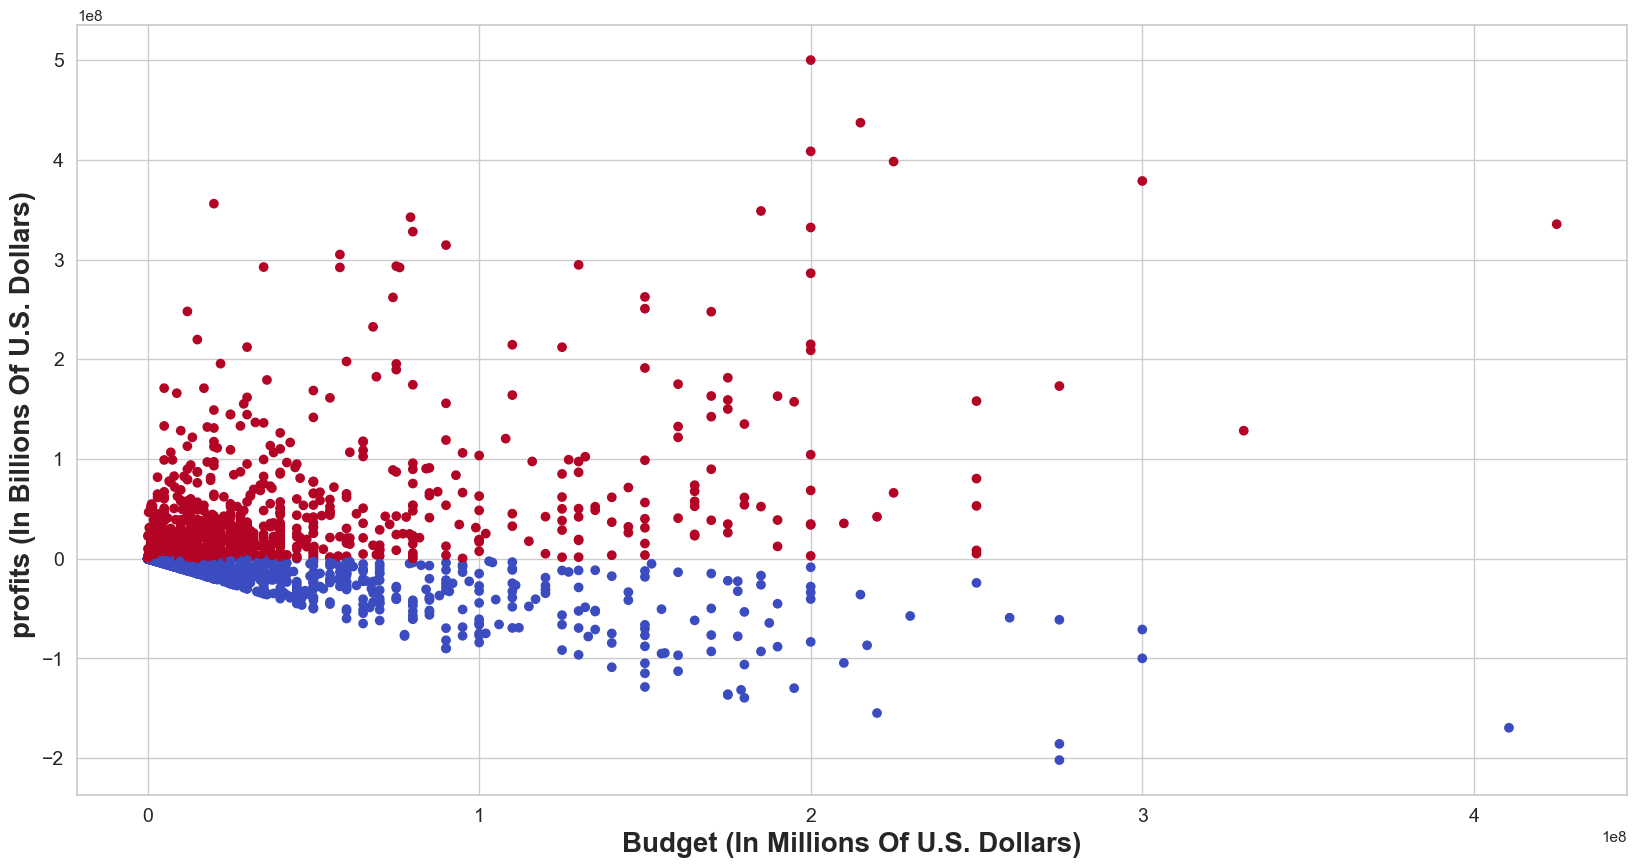

In [238]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
x = data_2["production_budget"]
y = data_2["profits"]
df = pd.DataFrame({'x': data_2["production_budget"], 'y': data_2["profits"]})
plt.xlabel('Budget (In Millions Of U.S. Dollars)', fontsize = 20 , weight ='bold')
plt.ylabel('profits (In Billions Of U.S. Dollars) ', fontsize = 20, weight ='bold')
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
ax.scatter(df.x, df.y, c=np.sign(df.y), cmap="coolwarm")
plt.show()

2. What is average revenue per month
>Since we are graphing by month, we need to provide the average revenue per month, so we need a revised dataframe to work with

In [239]:
month_average = data_2[['release_month', 'domestic_gross']]
month_average_grouped = month_average.groupby('release_month', as_index=False).mean()
month_average_grouped

,release_month,domestic_gross
0,1,2.990594e+07
1,2,5.040422e+07
2,3,3.895258e+07
3,4,3.548779e+07
4,5,7.392812e+07
5,6,7.221769e+07
6,7,7.098710e+07
7,8,3.808878e+07
8,9,3.072870e+07
9,10,2.696364e+07


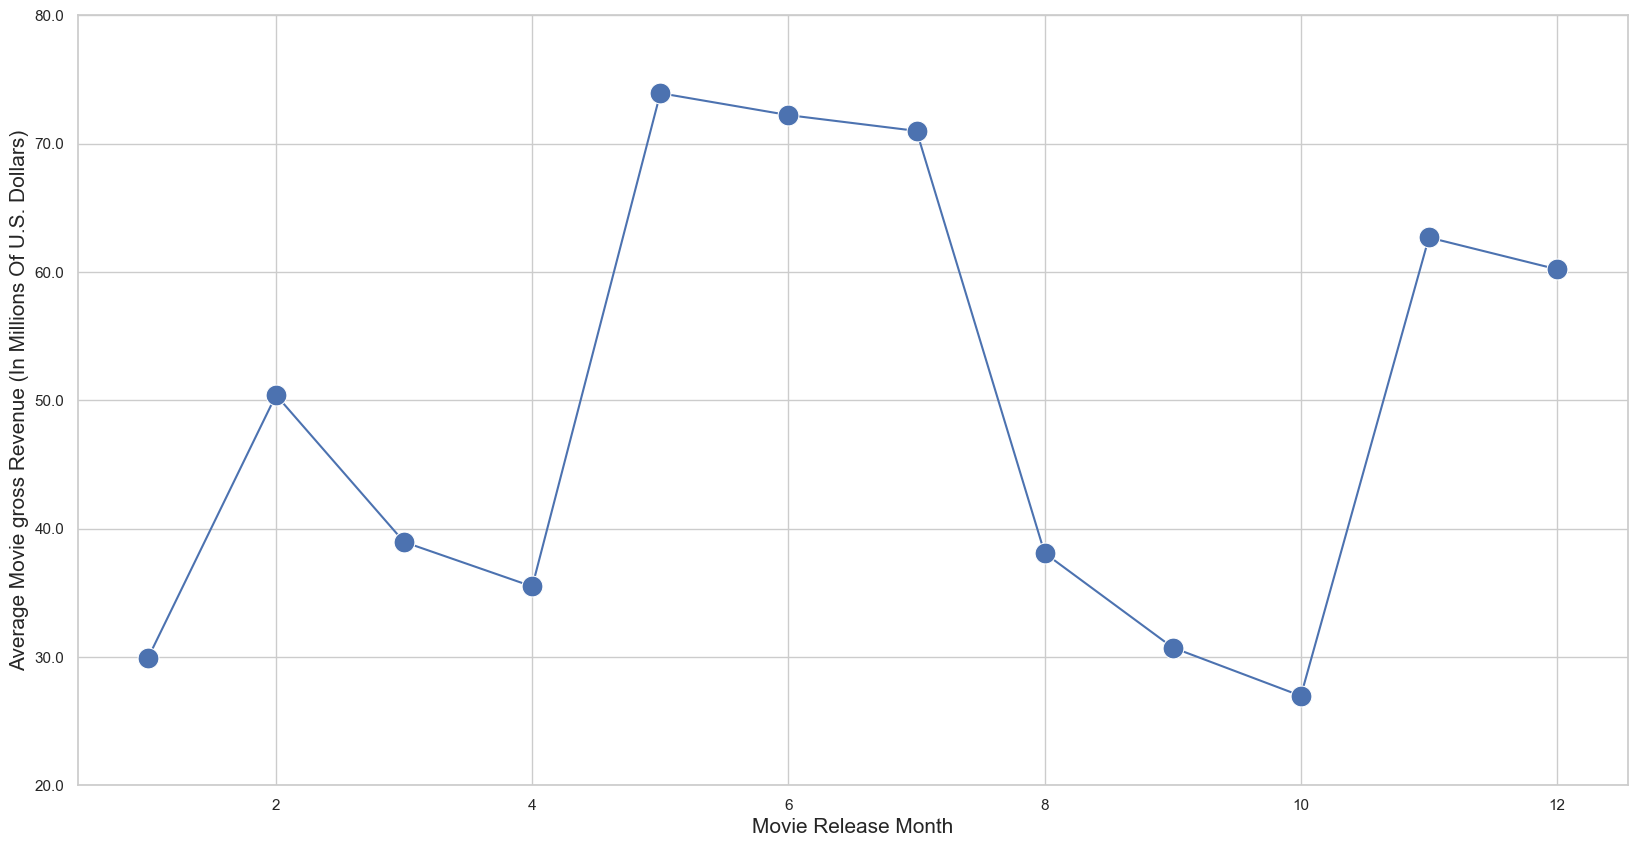

In [240]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

ax = sns.lineplot(x="release_month", y="domestic_gross", marker="o", ci=0, markersize=15, data=month_average_grouped)
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.ylabel('Average Movie gross Revenue (In Millions Of U.S. Dollars)', fontsize=15)
plt.xlabel('Movie Release Month', fontsize=15)
sns.set(style='whitegrid', font_scale=1.2)
plt.show()

3. What is correlation between "vote_count", "vote_average", and "popularity" with "production_budget"?

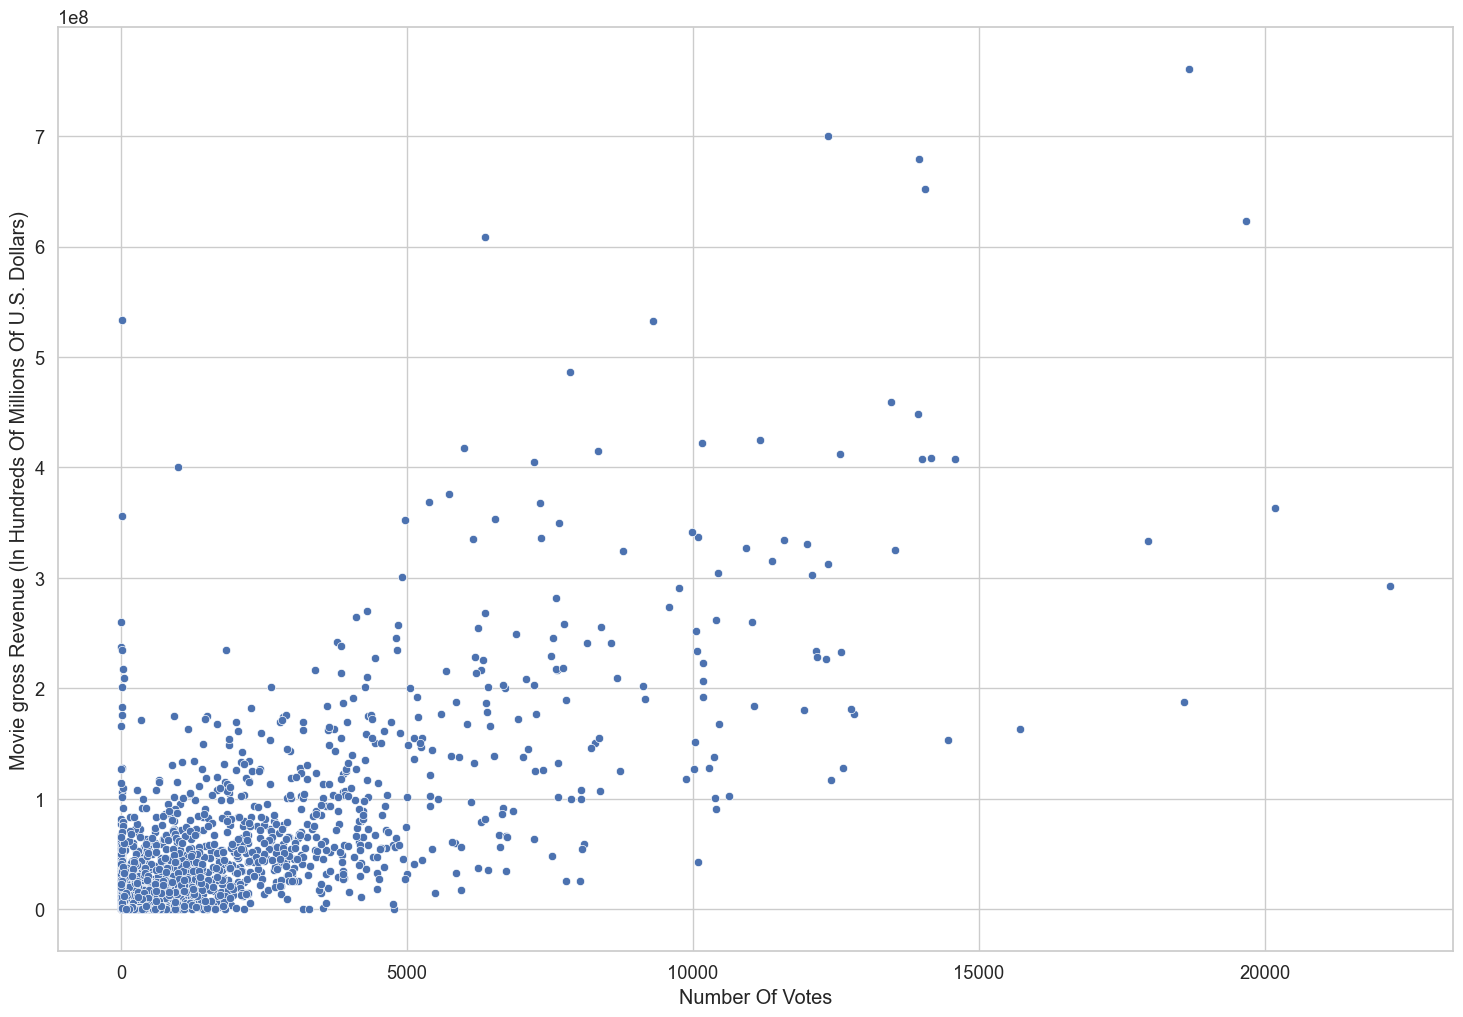

In [241]:
#scatterplot of vote_count and domestic_gross
fig, ax = plt.subplots()
fig.set_size_inches(18,12)

ax = sns.scatterplot(x="vote_count", y="domestic_gross", marker="o", data=data_2)
ax.set(xlabel='Number Of Votes', ylabel='Movie gross Revenue (In Hundreds Of Millions Of U.S. Dollars)')
sns.set(style='whitegrid', font_scale=1.5)
plt.show()

Observations 
> There is a correlation between number of votes and gross revenue.

comparing vote_average with domestic_gross

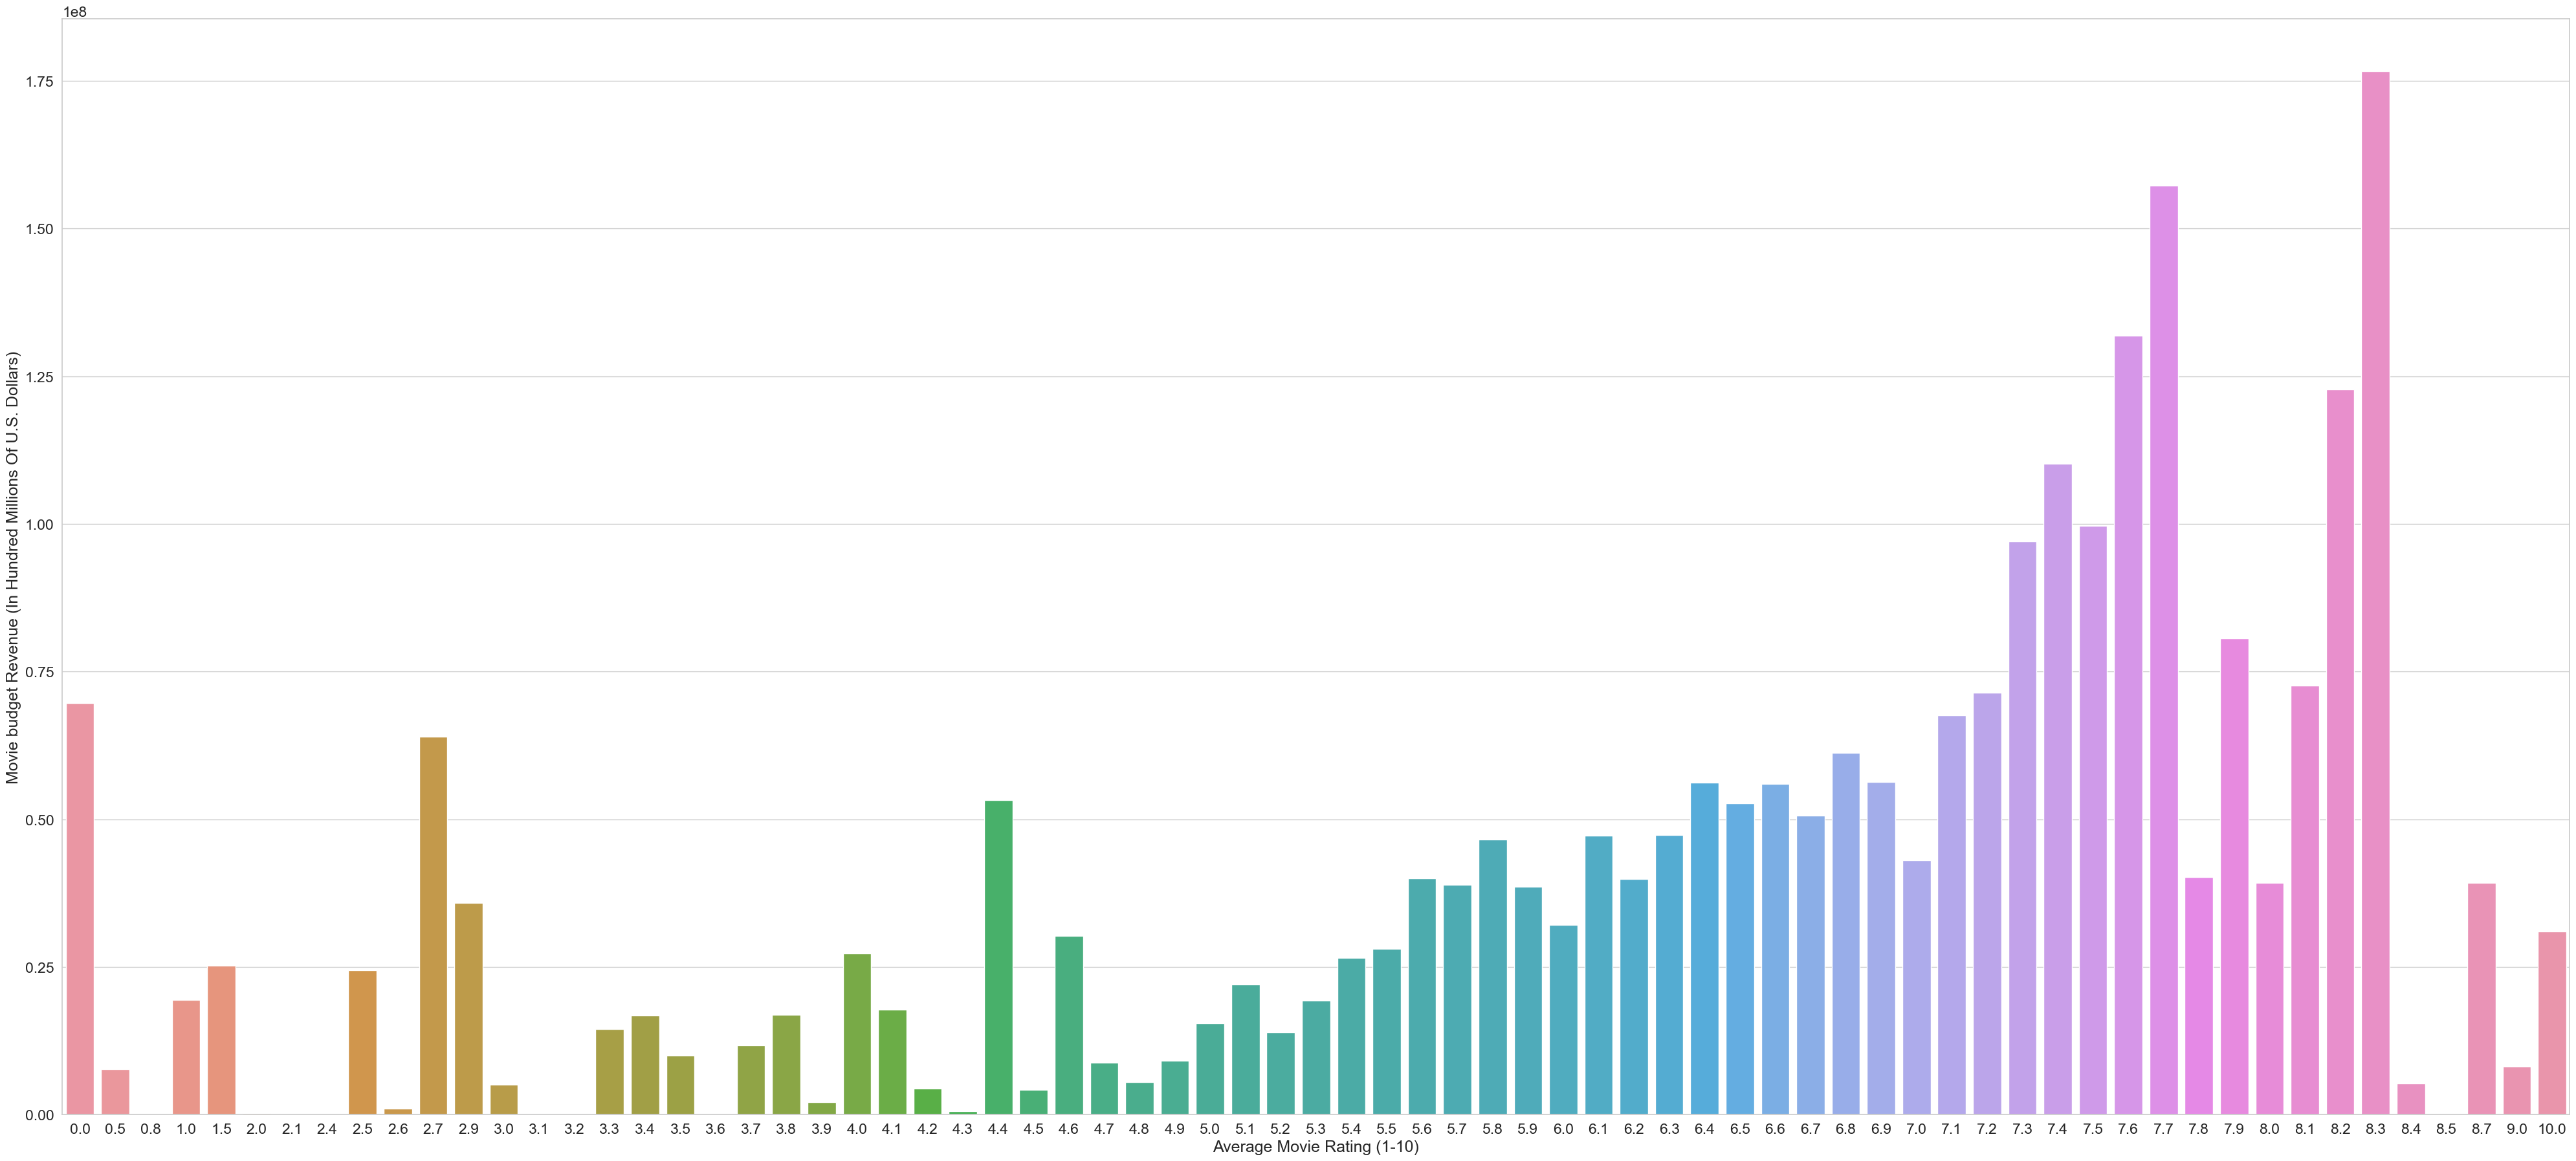

In [242]:
#scatterplot of vote_average with domestic_gross
fig, ax = plt.subplots()
fig.set_size_inches(50,22)

ax = sns.barplot(x="vote_average", y="domestic_gross",  ci=None, data=data_2)
ax.set(xlabel='Average Movie Rating (1-10)', ylabel='Movie budget Revenue (In Hundred Millions Of U.S. Dollars)')
sns.set(style='darkgrid', font_scale=2)
plt.show()

Observations 
>There is a strong grouping of average movie ratings 

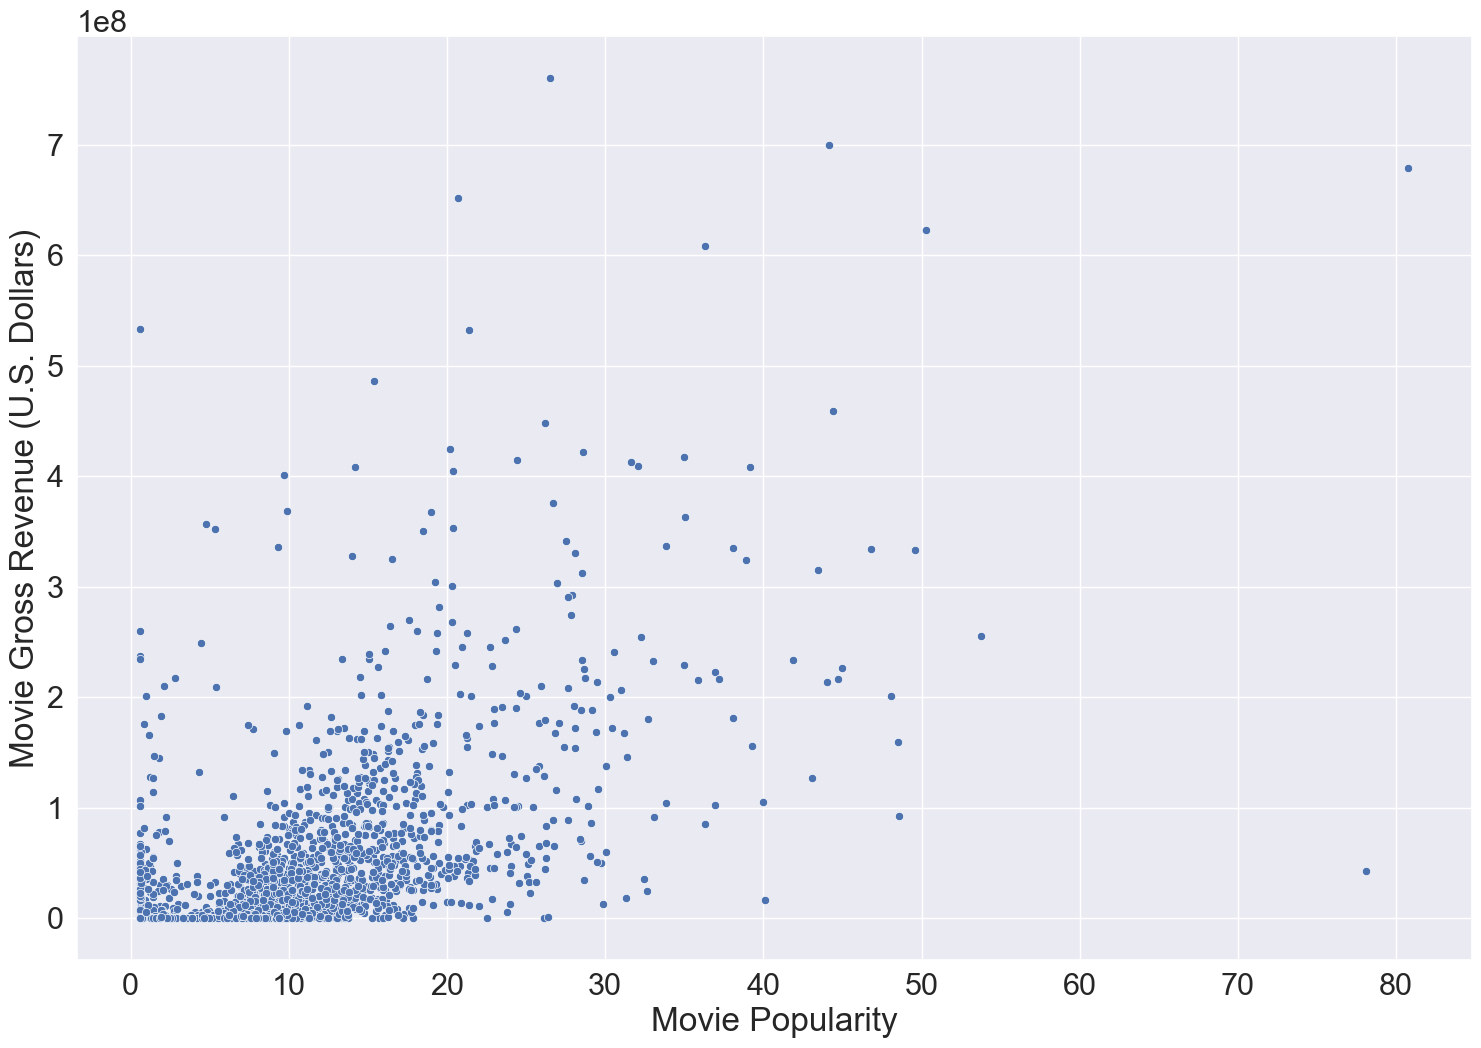

In [243]:
#scatterplot of popularity with domestic_gross
fig, ax = plt.subplots()
fig.set_size_inches(18,12)

ax = sns.scatterplot(x="popularity", y="domestic_gross", marker="o", ci=68, data=data_2)
ax.set(xlabel='Movie Popularity', ylabel='Movie Gross Revenue (U.S. Dollars)')
sns.set(style='darkgrid', font_scale=1.5)
plt.show()

Observations 
>There seems to be a strong grouping of data between 0 & 20 on the popularity scale, but once the data goes beyond that, there is no enough data meaning popularity is not a useful variable.

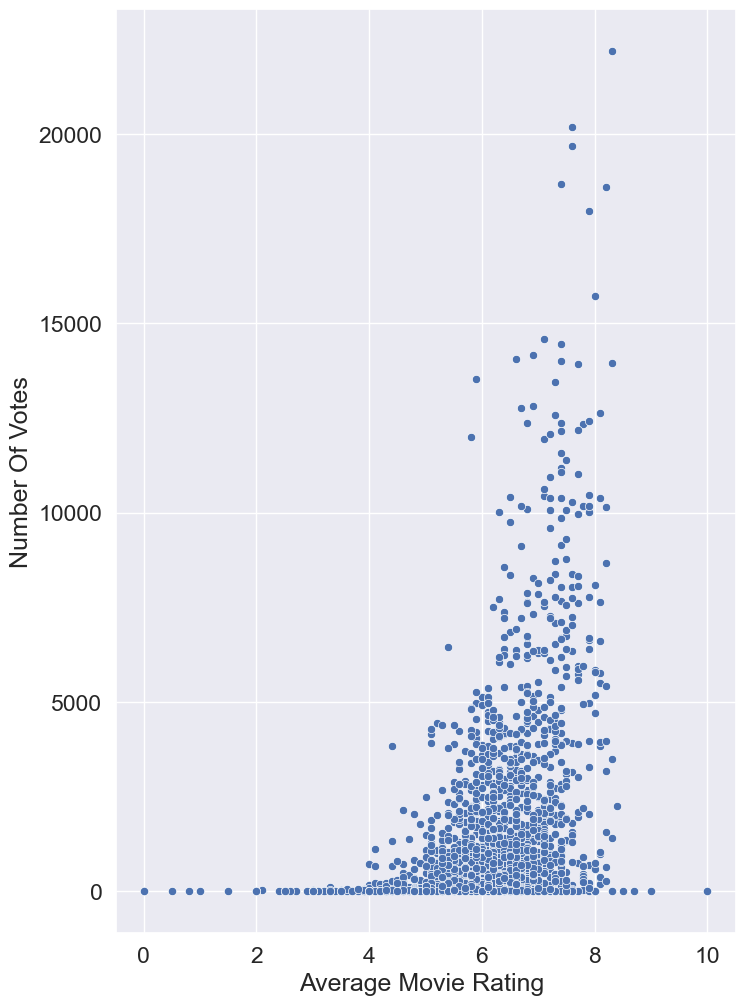

In [244]:
#scatterplot of vote_count vs. vote_average
fig, ax = plt.subplots()
fig.set_size_inches(8,12)

ax = sns.scatterplot(x="vote_average", y="vote_count", marker="o", ci=60, data=data_2)
ax.set(xlabel='Average Movie Rating ', ylabel='Number Of Votes')
sns.set(style='whitegrid', font_scale=1.2)
plt.show()

Observations 
>There are a lot of movies that have more than 1000 votes.

considering movies that have only 1000+ votes, on the "vote_average" and "domestic_gross" graph.
round off "vote_average" to the nearest whole number, to decrease the number of bars in the graph.

In [245]:
votes_and_budget = df_merged_movie[['vote_count', 'vote_average', 'domestic_gross']]
votes_and_budget_1000 = votes_and_budget.loc[votes_and_budget['vote_count'] >= 1000]
votes_and_budget_1000 = votes_and_budget_1000.round(0)
votes_and_budget_1000


,vote_count,vote_average,domestic_gross
movie,,,
10 cloverfield lane,4629,7.0,72082999
12 strong,1312,6.0,45819713
12 years a slave,6631,8.0,56671993
127 hours,4469,7.0,18335230
13 hours: the secret soldiers of benghazi,1573,7.0,52853219
2 guns,2368,6.0,75612460
2001: a space odyssey,5837,8.0,59936321
21 jump street,6527,7.0,138447667
22 jump street,5167,7.0,191719337


4. what is average revenue for all rounded "vote_average"

In [246]:
votes_and_budget_1000_grouped = votes_and_budget_1000.groupby('vote_average', as_index=False).mean()
votes_and_budget_1000_grouped

,vote_average,vote_count,domestic_gross
0,4.0,2097.666667,7.923156e+07
1,5.0,2071.410256,5.079746e+07
2,6.0,2741.373134,7.638736e+07
3,7.0,4111.178914,1.036698e+08
4,8.0,6829.711340,1.445052e+08


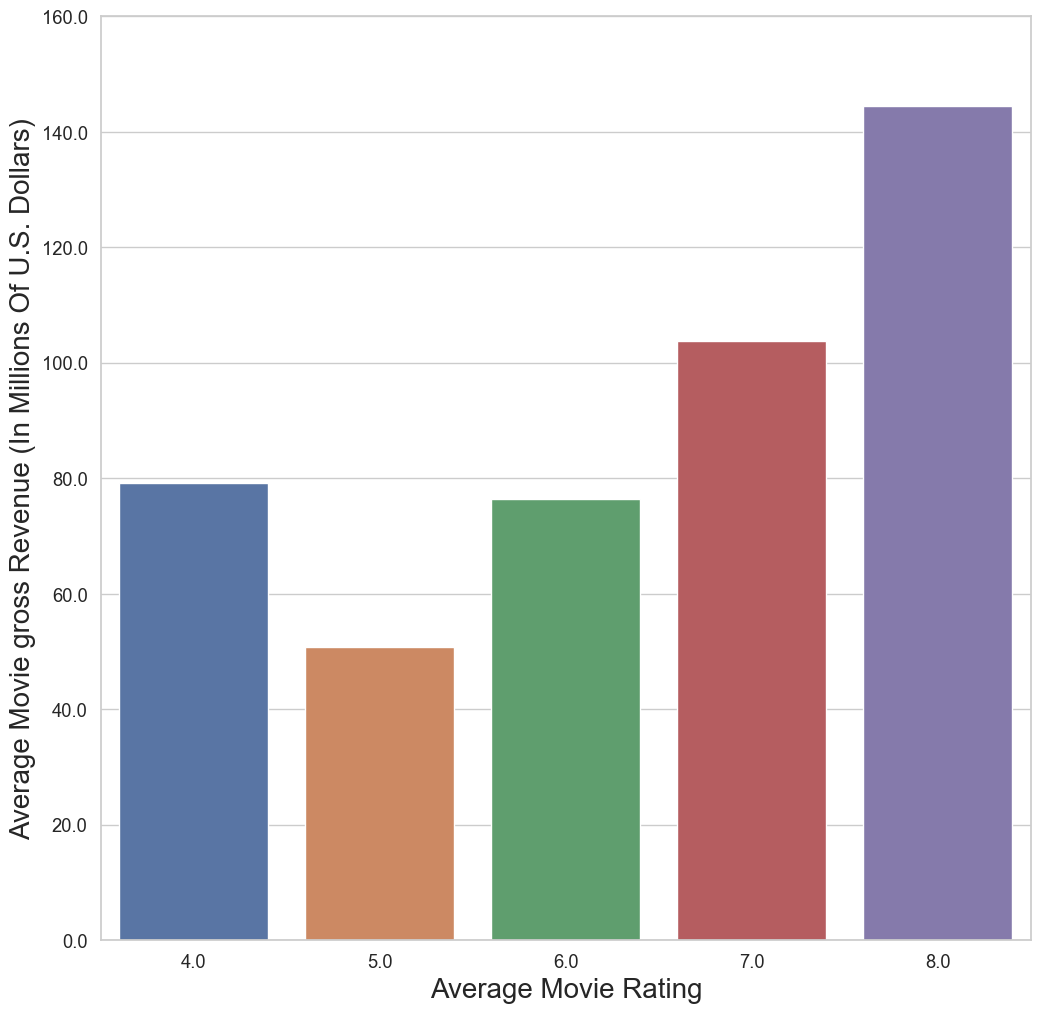

In [247]:
#scatterplot of vote_average, when vote_count is > 1000, and. production_budget
fig, ax = plt.subplots()
fig.set_size_inches(12,12)

ax = sns.barplot(x="vote_average", y="domestic_gross", ci=None, data=votes_and_budget_1000_grouped)
sns.set(style='whitegrid', font_scale=1.2)
sns.set_palette("Reds")
plt.yticks(ax.get_yticks(), ax.get_yticks()/1000000)
plt.ylabel('Average Movie gross Revenue (In Millions Of U.S. Dollars)', fontsize=20)
plt.xlabel('Average Movie Rating', fontsize=20)
plt.show()

5. what is the least/most production genre_ids

In [248]:
genres_average = data_2[['genre_ids', 'domestic_gross']]
genres_average_grouped = genres_average.groupby('genre_ids', as_index=False).mean()
genres_average_grouped_sorted = genres_average_grouped.sort_values(by='domestic_gross', ascending=True)
genres_average_grouped_sorted

,genre_ids,domestic_gross
551,"[53, 9648, 27, 18]",0.000000e+00
199,"[18, 10752, 28, 12]",0.000000e+00
40,"[10751, 35, 18]",0.000000e+00
196,"[18, 10751, 10770]",0.000000e+00
234,"[18, 35, 28, 80]",0.000000e+00
303,"[27, 99, 9648]",0.000000e+00
559,"[80, 18, 27, 9648]",0.000000e+00
558,"[80, 18, 10749]",0.000000e+00
58,"[10770, 80, 18, 53]",0.000000e+00
244,"[18, 53, 12, 27]",0.000000e+00


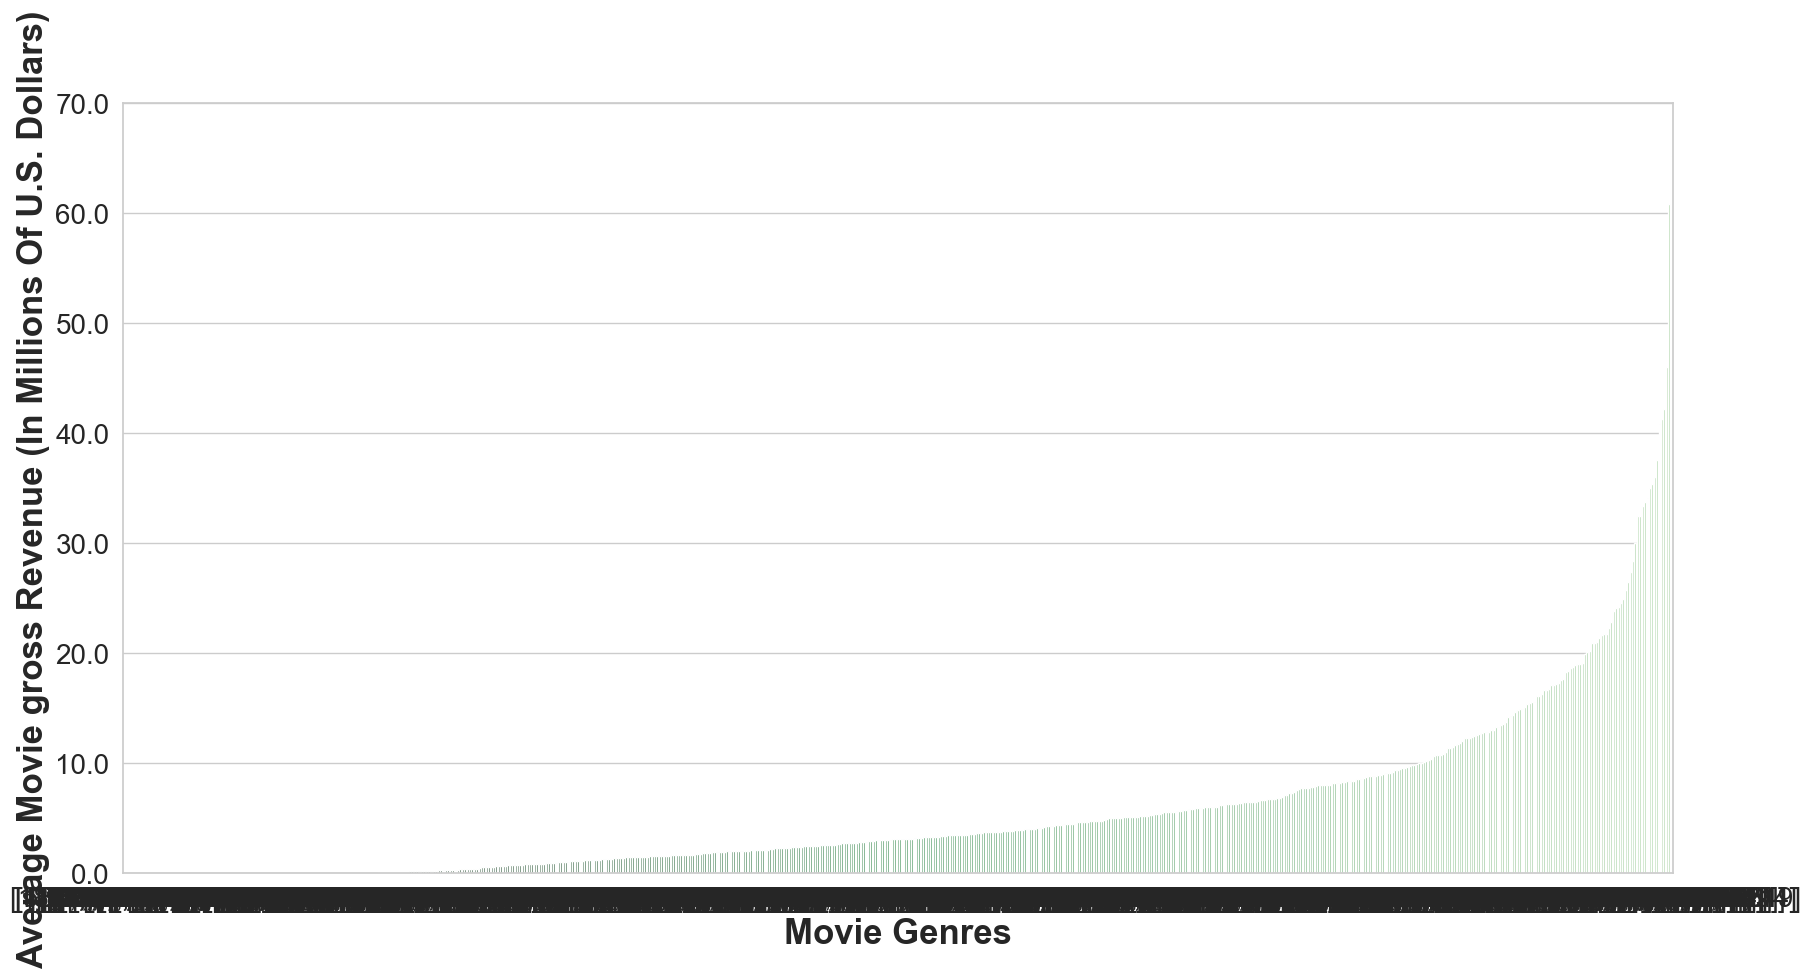

In [249]:
#scatterplot of genres vs. production_budget (average)
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True)
pal = sns.color_palette("Greens_d", len(genres_average_grouped_sorted))
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.barplot(x="genre_ids", y="domestic_gross", ci=None, palette=np.array(pal[::-1]),data=genres_average_grouped_sorted)
#ax.set(xlabel='Movie Genre', ylabel='Average Movie budget Revenue (U.S. Dollars)')
plt.xlabel('Movie Genres', fontsize=25, weight = 'bold')
plt.ylabel('Average Movie gross Revenue (In Millions Of U.S. Dollars)', fontsize=25, weight = 'bold')
plt.yticks(ax.get_yticks(), ax.get_yticks()/10000000)
plt.tick_params(axis='both', which='major', labelsize=20)
#sns.set_style('darkgrid')
plt.show()